# ASSIGNMENT 21

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dta = sm.datasets.fair.load_pandas().data
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

In [4]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


   affair
0    4313
1    2053


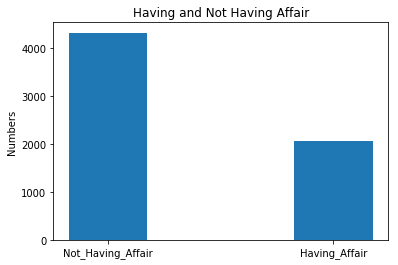

In [5]:
# VISUALISING THE DATA
label= dta['affair'].value_counts().to_frame()

print(label)

N = len(label)
target = label['affair']

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, target, width)

plt.ylabel('Numbers')
plt.title('Having and Not Having Affair')
plt.xticks(ind, ('Not_Having_Affair', 'Having_Affair'))

plt.show()

In [6]:
data_x= dta.drop(['affairs','affair'], axis=1) # drop affairs and affair col
data_y = dta['affair'] # get affair column 
print(data_x.head())
print("-"*80)
print(data_y.head())

   rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   

   occupation_husb  
0              5.0  
1              4.0  
2              5.0  
3              5.0  
4              4.0  
--------------------------------------------------------------------------------
0    1
1    1
2    1
3    1
4    1
Name: affair, dtype: int32


In [7]:
# Splitting the dataset into Train and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=26)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4456, 8)
(1910, 8)
(4456,)
(1910,)


In [8]:
# Creating the Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

clf_1 = LogisticRegression()
clf_1.fit(X_train, Y_train)

# Checking Accuracy 
accuracy = accuracy_score(Y_train, clf_1.predict(X_train))
rocauc= roc_auc_score(Y_train, clf_1.predict(X_train))

print(accuracy)
print(rocauc)

0.7199281867145422
0.6215968063872256


In [9]:
Y_pred = clf_1.predict(X_test)

In [10]:
# MODEL EVALUATION USING TEST DATA
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

accuracy = accuracy_score(Y_test, clf_1.predict(X_test))

rocauc= roc_auc_score(Y_test, clf_1.predict(X_test))

confusion_matrix = metrics.confusion_matrix(Y_test, clf_1.predict(X_test))

classification_report = metrics.classification_report(Y_test, clf_1.predict(X_test))
print("Accuracy Score : ",accuracy)
print("-"*50)
print("ROC_AUC SCORE : ",rocauc)
print("-"*50)
print("CONFUSION MATRIX : \n",confusion_matrix)
print("-"*50)
print("CLASSIFICATION REPORT: \n",classification_report)

Accuracy Score :  0.7272251308900524
--------------------------------------------------
ROC_AUC SCORE :  0.6233757253010642
--------------------------------------------------
CONFUSION MATRIX : 
 [[1183  124]
 [ 397  206]]
--------------------------------------------------
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

          0       0.75      0.91      0.82      1307
          1       0.62      0.34      0.44       603

avg / total       0.71      0.73      0.70      1910



In [11]:
## cross_val_score
from sklearn.model_selection import cross_val_score
clf_2 = LogisticRegression()

scores= cross_val_score(clf_2, data_x, dta['affair'], cv=10)
precision= cross_val_score(clf_2,  data_x, dta['affair'], cv=10, scoring='precision')
recall= cross_val_score(clf_2,  data_x, dta['affair'], cv=10, scoring='recall')

print("CROSS VALIDATION SCORE : ",scores.mean())
print("PRECISION : ",precision.mean())
print("RECALL : ",recall.mean())

CROSS VALIDATION SCORE :  0.722121014964216
PRECISION :  0.6279216037003922
RECALL :  0.3448827847501776


In [12]:
## ROC Curve for X_train & X_test

from sklearn.metrics import roc_curve, auc
from sklearn import metrics

#X_train
probs = clf_1.predict_proba(X_train)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(Y_train, preds)
roc_auc = metrics.auc(fpr, tpr)


#X_test
probs1 = clf_1.predict_proba(X_test)
preds1 = probs1[:,1]

fpr1, tpr1, threshold1 = metrics.roc_curve(Y_test, preds1)
roc_auc = metrics.auc(fpr1, tpr1)

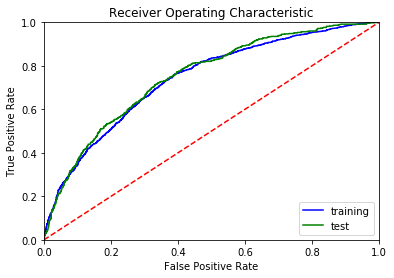

In [13]:
# VISUALISING THE ROC Curve

import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr1, tpr1, 'g', label = 'AUC = %0.2f' % roc_auc)

plt.legend(['training','test'],loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

In [ ]:
'''
CONCLUSION: Since the roc_auc score falls within the range of 0.6-0.7, this is a poor model.

'''